In [84]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
pd.options.display.max_rows = 999
pd.options.display.max_columns = 30

#dataframes
ls = pd.read_csv('listings.csv')
nb = pd.read_csv('neighbourhoods.csv')
rv = pd.read_csv('reviews.csv')
cl = pd.read_csv('calendar.csv')

In [9]:
#rename column id to listing_id
ls = ls.rename(columns={'id':'listing_id'})

In [14]:
#drop empty columns
ls.drop('neighbourhood_group', axis = 1, inplace = True)

In [31]:
#check if both worked
ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7889 entries, 0 to 7888
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   listing_id                      7889 non-null   int64  
 1   name                            7889 non-null   object 
 2   host_id                         7889 non-null   int64  
 3   host_name                       7889 non-null   object 
 4   neighbourhood                   7889 non-null   object 
 5   latitude                        7889 non-null   float64
 6   longitude                       7889 non-null   float64
 7   room_type                       7889 non-null   object 
 8   price                           7889 non-null   int64  
 9   minimum_nights                  7889 non-null   int64  
 10  number_of_reviews               7889 non-null   int64  
 11  last_review                     6655 non-null   object 
 12  reviews_per_month               66

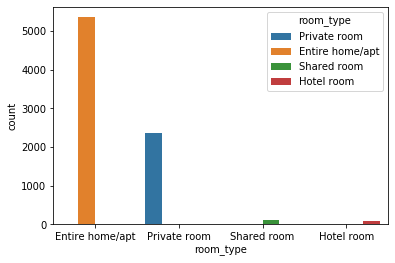

In [7]:
#Which room type is most popular overall?
sns.countplot(x=ls['room_type'], hue=ls['room_type'], order = ls['room_type'].value_counts().index)

In [36]:
#avg pricing by room types?
mean_roomtype = ls.groupby('room_type')
mean_roomtype = mean_roomtype.mean()
mean_roomtype = mean_roomtype.sort_values('price', ascending = False)
mean_roomtype

,listing_id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
room_type,,,,,,,,,,
Hotel room,2.547061e+07,8.475386e+07,41.908240,-87.643676,261.306667,2.120000,42.786667,2.379508,13.253333,138.573333
Entire home/apt,2.805788e+07,9.492179e+07,41.901721,-87.661493,194.034760,7.537657,41.189124,1.967557,18.893665,169.128387
Private room,2.630111e+07,9.437260e+07,41.891955,-87.668227,113.255211,4.261591,44.199064,1.813012,7.819651,155.396852
Shared room,2.420868e+07,9.881879e+07,41.899313,-87.662399,44.991071,3.598214,25.598214,0.907895,9.116071,143.339286


In [65]:
#Who is the most popular host?
group_host = ls.groupby(['host_id','host_name'])
group_host = group_host['calculated_host_listings_count'].count()
group_host = group_host.sort_values(ascending = False)
group_host.head(10)

host_id    host_name         
107434423  Blueground            220
12243051   Sonder                 98
55976787   Natalia                80
3965428    Rob                    76
8534462    Corp Condos & Apts     62
88566861   Kasa                   61
47172572   Zencity                61
99375151   Marina                 45
229095817  Loftium                45
9094538    Nicole                 39
Name: calculated_host_listings_count, dtype: int64

In [59]:
ls.columns

Index(['listing_id', 'name', 'host_id', 'host_name', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [88]:
#what kind of properties do these top 10 hosts have?


host_room = ls.groupby(['host_id','host_name','room_type'])
host_room = host_room['calculated_host_listings_count'].count()
host_room = host_room.sort_values(ascending = False)
host_room

#how do I sort by the host_name?
#  df.sort_values(by=['col1'])

host_id    host_name           room_type      
107434423  Blueground          Entire home/apt    220
12243051   Sonder              Entire home/apt     92
55976787   Natalia             Private room        80
3965428    Rob                 Entire home/apt     75
8534462    Corp Condos & Apts  Entire home/apt     62
                                                 ... 
91366430   Lacey               Entire home/apt      1
91194876   Steven              Entire home/apt      1
91175420   Rachel              Entire home/apt      1
90924431   Magdalena           Entire home/apt      1
2140       Lois                Entire home/apt      1
Name: calculated_host_listings_count, Length: 4522, dtype: int64

In [91]:
ls.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [98]:
#which neighborhoods are the top ten located in?
hostname = ls.groupby('neighbourhood')['host_name'].value_counts()
hostname = hostname.sort_values(ascending = False)
hostname.head(10)

neighbourhood    host_name         
Loop             Blueground            86
Near West Side   Natalia               73
Near North Side  Blueground            71
                 Corp Condos & Apts    62
Near West Side   Blueground            46
                 Marina                42
Near North Side  Rob                   35
Loop             Kasa                  33
Lake View        Nicole                29
Near North Side  Kasa                  28
Name: host_name, dtype: int64

In [99]:
ls.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
#minimum nights and price
minprice = ls.groupby(['host_id','host_name','minimum_nights'])
minprice = minprice['calculated_host_listings_count'].count()
host_room = host_room.sort_values(ascending = False)
host_room